## Naive Bayes Classification

It can be classified into 3- types :


1.   Gaussian Naive Bayes - independent variable is continous and have normal distribution,
2.   Multinomial Naive Bayes - when problem is associated with multiclass classificatio and data is divided to multiple classes,
3.   Binomial Naive Bayes - same as multinomial the only major difference is that predictor(independent) variable is/are boolean type variable

---

  P(A|B) = A-Prior Event, B-Posterior Event
        ---------------------------------
                  P(B|A)*P(B)
        ---------------------------------
             P(B|A)*P(B) + P(B|A)*P(B)




###Import all important libraries

In [ ]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2952 sha256=d9dca138b2a37dd0272b1f65514b0468a66b2d349743b5c14d24727e92f4da7c
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


In [ ]:
import pandas as pd #for data cleaning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler      #Min-Max Scaling
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

###Import the file
here we will going to download the Iris dataset which could be downloaded from Kaggle/Github

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Iris.csv')

###EDA for iris data set

In [ ]:
#Prefer Sample() method since it gives idea of data from mid also
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
119,120,6.0,2.2,5.0,1.5,Iris-virginica
121,122,5.6,2.8,4.9,2.0,Iris-virginica
46,47,5.1,3.8,1.6,0.2,Iris-setosa
45,46,4.8,3.0,1.4,0.3,Iris-setosa


In [ ]:
#Check the shape
data.shape

(150, 6)

In [ ]:
#Check the description of dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Check wheter there is any null values or not and data type of each attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#Since there is only one object data type named Species, so we would check the various %age of each sub-category
data["Species"].value_counts(normalize= True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

In [ ]:
# @title Since we would we using Naive Bayes, so in Naive Bayes it don't check the relationship among independent variable it assumes that variable are independent of each other and correlation between them is 0

#Check the correlation
data.corr()

<ipython-input-10-b7803a71941b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### **Preparing** the data for analysis and to be used in ***Naive Baye Classifier***

In [ ]:
#Classify the input parameters- X and output parameters- y
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [ ]:
#Split the X,y into training and test data using sklearn test_train_splt method
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle= True, random_state=42)

#Check the shape of train and test datasets
X_train.shape , X_test.shape

((120, 4), (30, 4))

In [ ]:
X_train[:10]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1]])

In [ ]:
#Since values of each parameter is not on same scale/range, so one with greater range would dominate other,
#Hence in order to avoid influence of one variable over other we would use Min-Max Scaler, not z-standardiztion
# because Naive Bayes Classifier don't work on negative values

#Min-Max Scaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train[:10]

array([[0.08823529, 0.66666667, 0.        , 0.04166667],
       [0.41176471, 1.        , 0.0877193 , 0.125     ],
       [0.70588235, 0.45833333, 0.59649123, 0.54166667],
       [0.14705882, 0.58333333, 0.10526316, 0.04166667],
       [0.02941176, 0.5       , 0.05263158, 0.04166667],
       [0.58823529, 0.20833333, 0.70175439, 0.75      ],
       [0.61764706, 0.5       , 0.61403509, 0.58333333],
       [0.26470588, 0.625     , 0.0877193 , 0.04166667],
       [0.20588235, 0.66666667, 0.07017544, 0.04166667],
       [0.26470588, 0.875     , 0.0877193 , 0.        ]])

In [ ]:
#Initializing the Naive Bayes
classifier = GaussianNB()

#Train the model
model = classifier.fit(X_train, y_train)
model

GaussianNB()

## **Predicting and Evaluation of classifier**

In [ ]:
#Making prediction for test data
y_pred = classifier.predict(X_test)

#Comapring the actual with the predicted values
pd.DataFrame(data = {"Actual Label": y_test, "Predicted Labels": y_pred}).head(5)

,Actual Label,Predicted Labels
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor


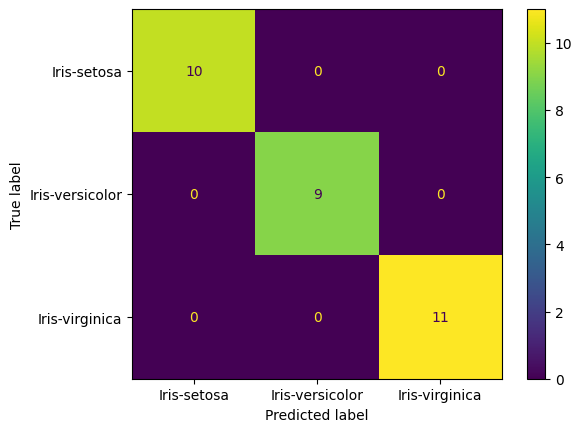

In [ ]:
#plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

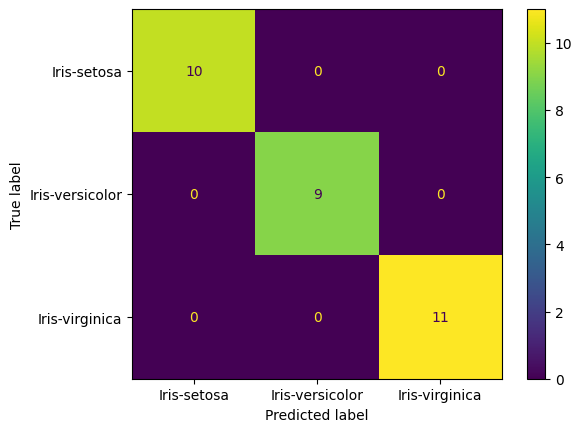

In [ ]:
#plot Confusion Matrix using from_predictions method
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
#Check the accuracy score
accuracy_score(y_test, y_pred)

1.0

**here we can see, the model has 100% accuracy in prdicting the type of flower**

In [ ]:
#Check the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Finally, we can see Naive Bayes has performed well in multi-class classification tak**